### TO DO:
- controllare se ci sono metodi che lui non usa (drop, value_counts, classification_report, classification_report_imbalanced)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



# Import red wine data
red_wine = pd.read_csv("../winequality-red.csv", delimiter=';')

# Import white wine data
white_wine = pd.read_csv("../winequality-white.csv", delimiter=';')

# Visualize array dimensions
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)


Red wine shape: (1599, 12)
White wine shape: (4898, 12)


There are significantly more data samples for white wines compared to red wines.
I decided to analyze the two categories separately at first in order to identify pattern in each group, afterward I'll perform a unified analysis to explore any common trends when combining both datasets.

### White Wine Analysis
- observations : 4898
- features: 12

In [33]:
white_wine.head(1000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.8,0.27,0.34,1.60,0.046,27.0,154.0,0.9927,3.05,0.45,10.5,6
996,6.0,0.26,0.34,1.30,0.046,6.0,29.0,0.9924,3.29,0.63,10.4,5
997,6.1,0.24,0.27,9.80,0.062,33.0,152.0,0.9966,3.31,0.47,9.5,6
998,8.0,0.24,0.30,17.45,0.056,43.0,184.0,0.9997,3.05,0.50,9.2,6


Text(0.5, 1.0, 'Distribution of White Wine Quality')

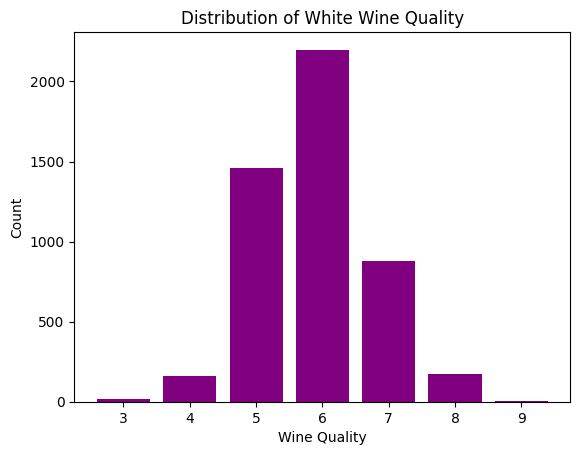

In [34]:
quality_counts = white_wine['quality'].value_counts().sort_index()

xpoints=quality_counts.index
ypoints=quality_counts.values

plt.bar(xpoints, ypoints, color='purple')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of White Wine Quality")

We can see from the graph below that the distribution of data is centered in two values: 5 and 6 in which we have more than 1000 observations, in the values 7 we have a middle number of observation less than 1000, while in the other categories we have at most 100 observation.
I can conclude that the dataset is imbalanced.

In [35]:
x = white_wine.drop('quality', axis=1)
y= white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

I'll scale the set, necessary for some models.

In [36]:
# Initialize scaler
scaler = StandardScaler()

# Calculate mean and standard deviation on the training set
scaler.fit(X_train)

# Apply transformation to both set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 2.32284039,  0.50470266,  0.8662186 , ..., -1.51772021,
        -0.78700334,  1.69068034],
       [ 2.5619175 , -0.77559843, -0.04041105, ..., -0.32122912,
        -1.13611925, -0.58045974],
       [-0.78516206,  0.20924857,  0.70137685, ..., -0.38770085,
        -0.9615613 ,  0.87955888],
       ...,
       [-1.26331629,  0.01227917,  2.67947791, ...,  3.1353007 ,
         0.52218136,  0.23066172],
       [ 1.36653194,  0.40621796,  0.20685158, ...,  0.67584679,
        -0.17605048,  1.20400747],
       [-1.14377773, -0.97256782, -0.37009456, ...,  0.14407297,
        -0.9615613 ,  0.63622245]], shape=(3918, 11))

In [37]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=4000),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}

In [38]:
best_models = {}
for name, model in models.items():
    if name == 'Decision Tree':
        x = X_train
        test = X_test
    else:
        x = X_train_scaled
        test = X_test_scaled

    model.fit(x, y_train)
    y_pred = model.predict(test)

    acc = accuracy_score (y_test, y_pred)
    print(f"{name} Accuracy: {acc}")

    if acc >= 0.67:
        best_models[name] = model

SVM Accuracy: 0.5530612244897959
Logistic Regression Accuracy: 0.5377551020408163
MLP Accuracy: 0.563265306122449
Decision Tree Accuracy: 0.6


These accuracy are a little low, let's try if some oversample can make some higher performance

We can notice that the precision is high only for 5 and 6 values of quality.
We have to do some oversampling for the categories with lowest precision.

### SMOTE



In [46]:
from imblearn.over_sampling import SMOTE  #library taken from slide 17

X_resampled, y_resampled = SMOTE(k_neighbors=4).fit_resample(X_train, y_train)

# Scale new X
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 4, n_samples = 4

In [40]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_resampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_resampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_resampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()


Model:  SVM
Training Accuracy:  0.7732796780684105
Testing Accuracy:  0.4479591836734694

Model:  Logistic Regression
Training Accuracy:  0.5113883299798793
Testing Accuracy:  0.3469387755102041

Model:  MLP
Training Accuracy:  0.8571428571428571
Testing Accuracy:  0.5071428571428571

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.5816326530612245



### Random OverSampler

In [41]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

# Scale new X
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


In [42]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_resampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_resampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_resampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()

Model:  SVM
Training Accuracy:  0.7672434607645875
Testing Accuracy:  0.45816326530612245

Model:  Logistic Regression
Training Accuracy:  0.4693762575452716
Testing Accuracy:  0.3489795918367347

Model:  MLP
Training Accuracy:  0.8898189134808853
Testing Accuracy:  0.5163265306122449

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.5969387755102041



### Manually Undersampling
I think that in this case the manually undersempling is not so effective because we have a very low number of observations that if we try to undersampler all classes we have to have like 4 observations for each variables that means that almost all the observation will be scarted.

However I'll try to eliminate

In [43]:
n_samples = 100 # number of selected samples

# Select only samples with quality == 5 and do undersampling
df_quality_5 = white_wine[white_wine['quality'] == 5]
df_quality_sampled = df_quality_5.sample(n=n_samples, random_state=42)

# Select other samples
df_other_qualities = white_wine[white_wine['quality'] != 5]

# Combine both samples
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)

# Do the same for samples with quality == 6
df_quality_6 = white_wine[white_wine['quality'] == 6]
df_quality_sampled = df_quality_6.sample(n=n_samples, random_state=42)
df_other_qualities = white_wine[white_wine['quality'] != 6]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)

# Do the same for samples with quality == 7
df_quality_7 = white_wine[white_wine['quality'] == 7]
df_quality_sampled = df_quality_7.sample(n=n_samples, random_state=42)
df_other_qualities = white_wine[white_wine['quality'] != 7]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)


# Extract X and Y from updated data
X_undersampled = df_undersampled.drop('quality', axis=1)
y_undersampled = df_undersampled['quality']

Scale Data

In [44]:
scaler = StandardScaler()
scaler.fit(X_undersampled)

X_train_scaled = scaler.transform(X_undersampled)
X_test_scaled = scaler.transform(X_test)

Try executing different models for the new dataset.

In [45]:
for name, model in models.items():
    if name == 'Decision Tree':
        x_train = X_undersampled
        x_test = X_test
    else:
        x_train = X_train_scaled
        x_test = X_test_scaled

    model.fit(x_train, y_undersampled)
    y_predicted_train = model.predict(x_train)
    y_predicted_test = model.predict(x_test)

    acc_train = accuracy_score(y_undersampled, y_predicted_train)
    acc_test = accuracy_score(y_test, y_predicted_test)

    print('Model: ', name)
    print('Training Accuracy: ', acc_train)
    print('Testing Accuracy: ', acc_test)
    print()

Model:  SVM
Training Accuracy:  0.6850412821758135
Testing Accuracy:  0.5724489795918367

Model:  Logistic Regression
Training Accuracy:  0.6257892180670228
Testing Accuracy:  0.5306122448979592

Model:  MLP
Training Accuracy:  0.7790189412336086
Testing Accuracy:  0.6785714285714286

Model:  Decision Tree
Training Accuracy:  1.0
Testing Accuracy:  0.860204081632653

